In [38]:
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, RegexpParser
import pandas as pd



In [11]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aaronweiss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aaronweiss/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
def get_sentence_tokens(text):
    """
    Tokenizes text into a list of sentences and then a list of tokens.
    """
    # Tokenize text into sentences.
    sentences = nltk.sent_tokenize(text)

    # Tokenize each sentence into words.
    sentence_tokens = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        sentence_tokens.append(tokens)

    return sentence_tokens


def get_pos_tags(tokens):
    """
    Uses part-of-speech tagging to label each token with its grammatical category.
    """
    pos_tags = pos_tag(tokens)
    return pos_tags


def get_named_entities(pos_tags):
    """
    Identifies named entities (e.g., people, places, organizations) in a text.
    """
    ne_chunked = nltk.ne_chunk(pos_tags)
    return ne_chunked


def get_syntax_tree(pos_tags):
    """
    Uses a built-in grammar to identify the syntactic structure of the text.
    """
    grammar = r"""
        NP: {<DT|JJ|NN.*>+} # Noun phrase
        PP: {<IN><NP>} # Prepositional phrase
        VP: {<VB.*><NP|PP|CLAUSE>+$} # Verb phrase
        CLAUSE: {<NP><VP>} # Clause
    """
    parser = RegexpParser(grammar)
    tree = parser.parse(pos_tags)
    return tree


def get_sentence_length(sentence_tokens):
    """
    Calculates the number of words in a sentence.
    """
    return len(sentence_tokens)


def get_sentence_complexity(sentence):
    """
    Calculates the average number of clauses per sentence.
    """
    parser = nltk.parse.load_parser('grammar.cfg')
    clause_count = len(list(parser.parse(sentence)))
    if clause_count == 0:
        return 0
    else:
        return clause_count / len(sentence)


In [3]:
df = pd.read_excel("human_ai.xlsx")

In [4]:
def get_sentence_tokens(df, column_name):
    """
    Tokenizes each sentence in a column of a Pandas dataframe into a list of tokens.
    Returns a new dataframe with a new column containing the tokenized sentences for each row of the input column.
    """
    # Tokenize text into sentences.
    sentences = df[column_name].apply(nltk.sent_tokenize)

    # Tokenize each sentence into words.
    sentence_tokens = sentences.apply(lambda sentences: [nltk.word_tokenize(sentence) for sentence in sentences])

    return sentence_tokens

tokens = get_sentence_tokens(df, 'prompt')

In [7]:
type(tokens)

pandas.core.series.Series

In [13]:
def get_pos_tags(tokens):
    """
    Uses part-of-speech tagging to label each token with its grammatical category.
    """
    pos_tags = pos_tag(tokens)
    return pos_tags

# converts non-string tokens into strings
tokens = [str(token) if not isinstance(token, str) else token for token in tokens]


pos_tags = get_pos_tags(tokens)

In [29]:

for token in tokens[0]:
pos_tag1 = pos_tag(tokens[0])

TypeError: tokens: expected a list of strings, got a string

In [14]:
def get_named_entities(pos_tags):
    """
    Identifies named entities (e.g., people, places, organizations) in a text.
    """
    ne_chunked = nltk.ne_chunk(pos_tags)
    return ne_chunked

ne_chunked = get_named_entities(pos_tags)

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker/PY3/english_ace_multiclass.pickle[0m

  Searched in:
    - '/Users/aaronweiss/nltk_data'
    - '/Users/aaronweiss/miniforge3/envs/torch/nltk_data'
    - '/Users/aaronweiss/miniforge3/envs/torch/share/nltk_data'
    - '/Users/aaronweiss/miniforge3/envs/torch/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [52]:
df2 = pd.DataFrame()

df2 = pd.read_excel("3class.xlsx")


In [54]:
df2.drop("Unnamed: 0", axis=1)
df2

,Unnamed: 0,prompt,completion
0,0,"\n\nIn the late 1800s, a woman by the name of ...",10thgrade
1,1,\n\nThe Hunt for Enemy Technology - Early Jets...,10thgrade
2,2,The Division of Labour\n\nThe division of labo...,6thgrade
3,3,\n\n“Yes the body:” A Quarantined Review of Sp...,10thgrade
4,4,"\n\nOnce upon a time, in a world far different...",6thgrade
...,...,...,...
295,295,\n\nThe History of Silicon Valley — A Brief Su...,6thgrade
296,296,\n\nYes the Body: A Quarantined Review of Spaw...,6thgrade
297,297,"\n\nAs I stand atop the Eildon Hills, overlook...",college
298,298,"\n\nAs human beings, we have always been fasci...",10thgrade


In [55]:
# Calculate the metrics
metrics_df2 = calculate_metrics(df2)


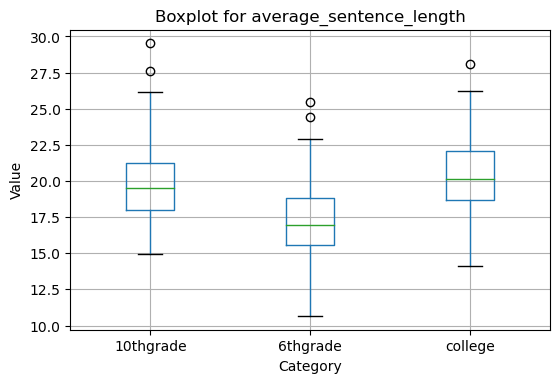

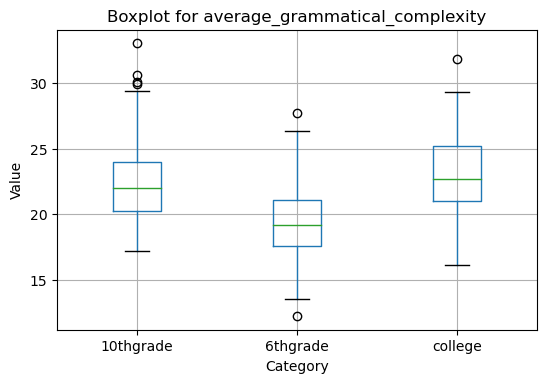

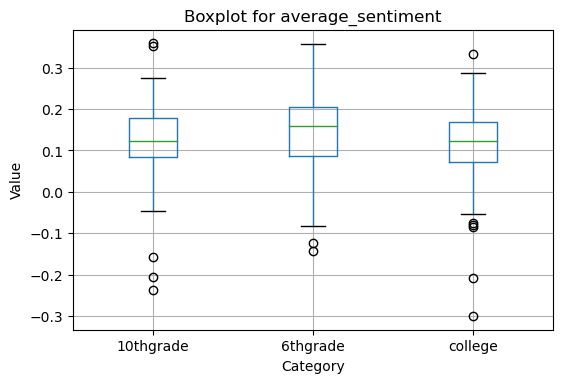

In [56]:
import matplotlib.pyplot as plt

# create box and whisker plots
for metric in ['average_sentence_length', 'average_grammatical_complexity', 'average_sentiment']:
    df2.boxplot(column=[metric], by='completion', figsize=(6, 4))
    plt.title(f'Boxplot for {metric}')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.suptitle('')
    plt.show()


In [34]:
prompt = df['prompt']

In [36]:
import pandas as pd
import nltk
from textblob import TextBlob

nltk.download('averaged_perceptron_tagger')

def calculate_metrics(df):
    """
    Calculates the average sentence length, average grammatical complexity, and average sentiment
    score for each row of text in the input DataFrame.
    
    Parameters:
        df (Pandas DataFrame): A DataFrame with a single column of text
    
    Returns:
        Pandas DataFrame: A new DataFrame with the columns 'average_sentence_length', 'average_grammatical_complexity',
        and 'average_sentiment'
    """
    # Define a function to calculate the POS tag count for a given sentence
    def pos_tag_count(sentence):
        pos_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
        tag_count = len(pos_tags)
        return tag_count
    
    # Define a function to calculate the sentiment score for a given sentence
    def sentiment_score(sentence):
        blob = TextBlob(sentence)
        score = blob.sentiment.polarity
        return score
    
    # Tokenize the text into sentences
    df['sentences'] = df['prompt'].apply(nltk.sent_tokenize)
    
    # Calculate the average sentence length for each row
    df['average_sentence_length'] = df['sentences'].apply(lambda x: sum(len(sentence.split()) for sentence in x)/len(x))
    
    # Calculate the average POS tag count for each row
    df['average_grammatical_complexity'] = df['sentences'].apply(lambda x: sum(pos_tag_count(sentence) for sentence in x)/len(x))
    
    # Calculate the average sentiment score for each row
    df['average_sentiment'] = df['sentences'].apply(lambda x: sum(sentiment_score(sentence) for sentence in x)/len(x))
    
    # Drop the 'sentences' column
    df = df.drop('sentences', axis=1)
    
    return df[['average_sentence_length', 'average_grammatical_complexity', 'average_sentiment']]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aaronweiss/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [37]:
# Calculate the metrics
metrics_df = calculate_metrics(df)

# Print the results
print(metrics_df)


     average_sentence_length  average_grammatical_complexity  \
0                  17.975610                       20.878049   
1                  16.428571                       18.968254   
2                  19.000000                       21.638889   
3                  39.333333                       43.166667   
4                  16.292683                       18.097561   
..                       ...                             ...   
445                20.485714                       23.685714   
446                23.457143                       25.971429   
447                21.029412                       23.235294   
448                19.828571                       22.028571   
449                23.647059                       26.382353   

     average_sentiment  
0             0.180748  
1             0.107971  
2             0.184185  
3            -0.009496  
4             0.072050  
..                 ...  
445           0.084739  
446           0.093564  
447   

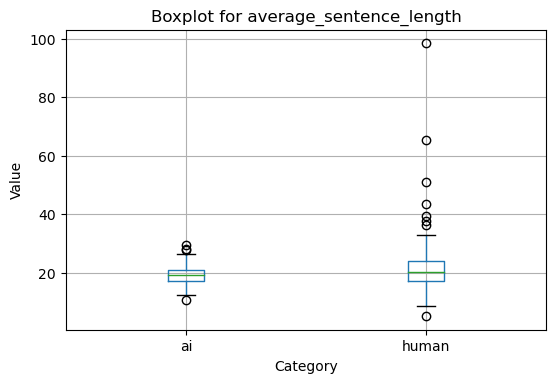

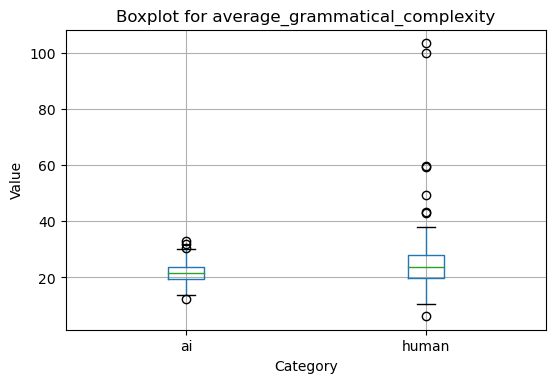

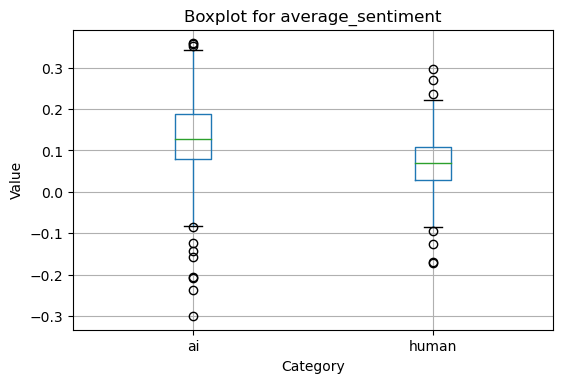

In [57]:
import matplotlib.pyplot as plt

# create box and whisker plots
for metric in ['average_sentence_length', 'average_grammatical_complexity', 'average_sentiment']:
    df.boxplot(column=[metric], by='completion', figsize=(6, 4))
    plt.title(f'Boxplot for {metric}')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.suptitle('')
    plt.show()
